In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

import time

from math import *

In [2]:
N_grid=34698

t_start=1913.5
t_end=2008.5
t=np.linspace(t_start, t_end, N_grid)
h=t[1]-t[0]

dw=0.1
p=365*11+2

W=2*np.pi/11
T=11

st=int(p/2)+1
fn=N_grid-st-1

In [3]:
s=44
T_sin=s*365
m=1.5
eps=np.pi/2-0.1

weight=0.5

k0_s=weight*(np.sin((2*np.pi)/s*t+eps)+m)

In [4]:
alpha=0.99
wait_time=int(1/(1-alpha))
sigma=0.005
t_t=np.linspace(t_start-wait_time/365, t_end, N_grid+wait_time)
k0_clear=weight*(np.sin((2*np.pi)/s*t_t+eps)+m)

In [5]:
samples=150
res=np.zeros((fn-st+1, samples))

In [6]:
for jj in range(samples): 
    start=time.time()
    k0_t=np.zeros(N_grid+wait_time, np.dtype(float))
    np.random.seed
    xi=sigma*np.random.randn(N_grid+wait_time)

    for i in range(N_grid+wait_time):
        if i==0:
            k0_t[i]=0
        else:
            k0_t[i]=alpha*k0_t[i-1]+xi[i-1]

    k0_t=k0_t+k0_clear

    k0=np.zeros(N_grid, np.dtype(float))
    k0=k0_t[int(1/(1-alpha)):]
    if k0[0]<2*dw:
        k0[0]=k0_clear[int(1/(1-alpha))]
        print("ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ")

    k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")
    f=lambda t, x: 2*dw-k0_f(t)*sin(x)
    init=np.arcsin(2*dw/k0[0])
    theta=[0]*N_grid
    for i in range(N_grid):
        if i==0:
            theta[i]=init
        else:
            k1=f(t[i-1], theta[i-1])*h
            k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
            k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
            k4=f(t[i-1]+h, theta[i-1]+k3)*h

            theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6

    theta=np.array(theta)
    x0=np.sin(W*t)
    y0=np.sin(W*t+theta)
    C_0=[0]*N_grid
    for i in range(N_grid):
        if (t[i]-T/2>=t_start) and (t[i]+T/2<=t_end):
            C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
        else:
            C_0[i]=nan
    phi0=np.arccos(C_0)
    k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))
    res[:,jj]=k_hat[st:fn+1]
    finish=time.time()
    print(jj, ' ::: ', finish-start)

np.savetxt('PT2411_k_hat_sine+ar_single_0.005_99.out', res, delimiter=',')

0  :::  18.325228691101074
1  :::  18.70920491218567
2  :::  18.168030977249146
3  :::  18.503831386566162
4  :::  20.38050103187561
5  :::  20.880901336669922
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
6  :::  18.728534698486328
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
7  :::  18.4867422580719
8  :::  18.736124992370605
9  :::  19.37864661216736
10  :::  19.576226949691772
11  :::  18.305301189422607
12  :::  19.322761297225952
13  :::  18.58700680732727
14  :::  18.28107738494873
15  :::  18.527132272720337
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
16  :::  18.768047332763672
17  :::  18.53980803489685
18  :::  18.560567378997803
19  :::  18.03920865058899
20  :::  18.62436842918396
21  :::  19.462555646896362
22  :::  18.51951575279236
23  :::  18.95370101928711
24  :::  19.406548023223877
25  :::  19.344152688980103
26  :::  20.79979157447815
27  :::  18.57848286628723
ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
28  :::  20.503296613693237
29  :::  22.963123559951782
30  :::  21.88498830795288
31  :::  20.45432734489441
32  :::  19.6175756454

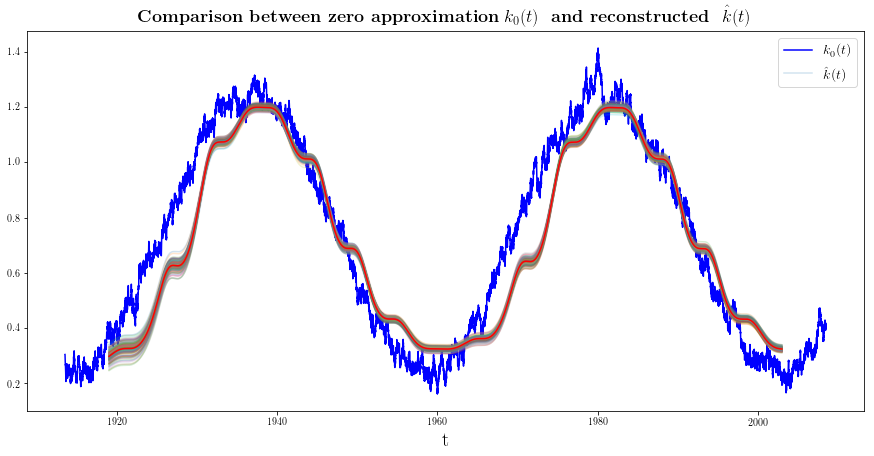

In [7]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t, k0, 'b')
for i in range(samples):
    plt.plot(t[st:fn+1], res[:, i], alpha=0.2)
plt.plot(t[st:fn+1], np.mean(res, axis=1), 'r')
#plt.plot(t, k_hat, 'r')
plt.legend([r'$k_0(t)$', r'$\hat{k}(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.show()


In [8]:
k_hat_l=np.zeros(fn-st+1)
k_hat_u=np.zeros(fn-st+1)

for i in range(fn+1-st):
    k_hat_l[i]=sorted(res[i,:])[4]
    k_hat_u[i]=sorted(res[i,:])[145]

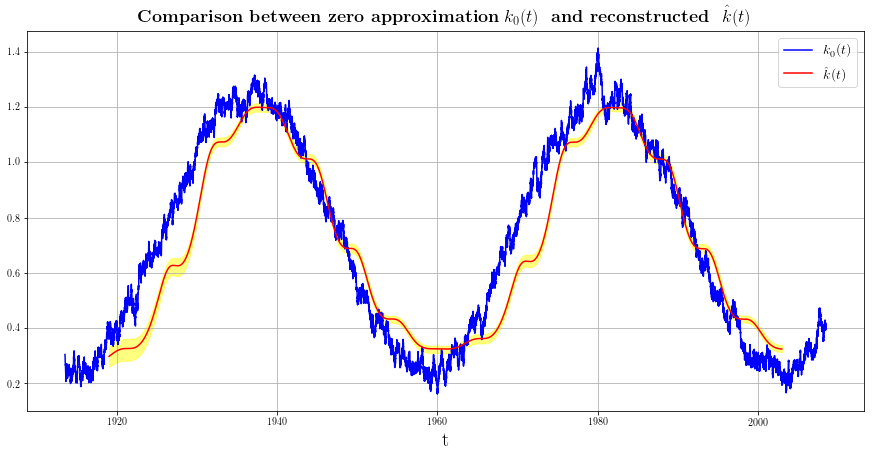

In [9]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t, k0, 'b')
plt.plot(t[st:fn+1], np.mean(res, axis=1), 'r')
plt.fill_between(t[st:fn+1], k_hat_l, k_hat_u, color="yellow", alpha=0.5)
#plt.plot(t, k_hat, 'r')
plt.legend([r'$k_0(t)$', r'$\hat{k}(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.grid()
plt.show()


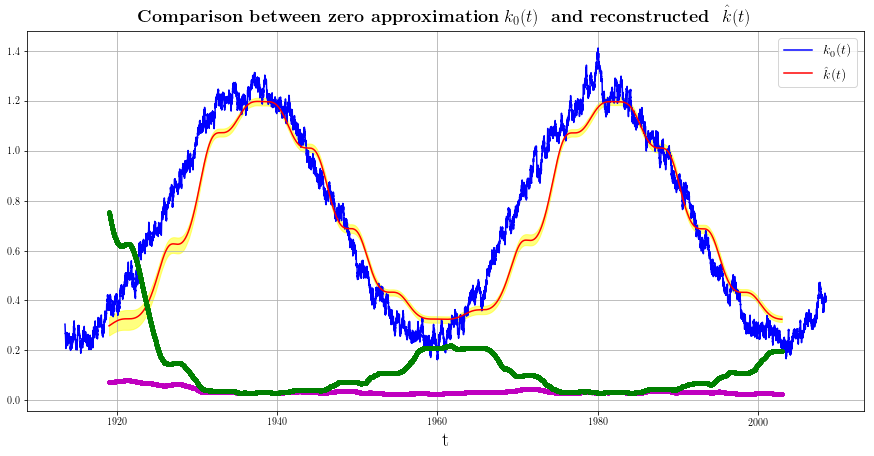

In [10]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t, k0, 'b')
plt.plot(t[st:fn+1], np.mean(res, axis=1), 'r')
plt.fill_between(t[st:fn+1], k_hat_l, k_hat_u, color="yellow", alpha=0.5)
plt.plot(t[st:fn+1], (k_hat_u-k_hat_l), 'm.-', linewidth=2)
plt.plot(t[st:fn+1], np.divide(k_hat_u-k_hat_l, np.mean(res, axis=1)-2*dw), 'g.-', linewidth=2)
#plt.plot(t, k_hat, 'r')
plt.legend([r'$k_0(t)$', r'$\hat{k}(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.grid()
plt.show()